# Проект: Зарплаты в Сан-Франциско 2011-2020 гг.

# 0. Предобработка и агрегация данных

Импортируем необходимые библиотеки для анализа и визуализации данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math_
import matplotlib.ticker as ticker
import seaborn as sns


Считываем данные и конкатенируем с помощью метода pd.concat, обращаем внимание на ignore_index=True, для того чтобы не получить ошибку 'ValueError: cannot reindex from a duplicate axis' 

In [5]:
df1 = pd.read_csv('san-francisco-2011.csv')
df2 = pd.read_csv('san-francisco-2012.csv')
df3 = pd.read_csv('san-francisco-2013.csv')
df4 = pd.read_csv('san-francisco-2014.csv')
df5 = pd.read_csv('san-francisco-2015.csv')
df6 = pd.read_csv('san-francisco-2016.csv')
df7 = pd.read_csv('san-francisco-2017.csv')
df8 = pd.read_csv('san-francisco-2018.csv')
df9 = pd.read_csv('san-francisco-2019.csv')
df10 = pd.read_csv('san-francisco-2020.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
df[::-10]

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status,Pension Debt
398350,Emiliano S Orencia III,Custodian,0.0,0.0,0.0,0.0,0.00,0.00,2020,NaN,San Francisco,NaN,0.0
398340,Jonathan Llamas,Swimming Instructor,23.73,0.0,0.0,0.0,23.73,23.73,2020,NaN,San Francisco,NaN,0.0
398330,Annette M Overby,Special Nurse,26.19,0.0,0.0,4.87,26.19,31.06,2020,NaN,San Francisco,NaN,0.0
398320,Flavio P Flaviani,Gardener,0.0,0.0,0.0,41.82,0.00,41.82,2020,NaN,San Francisco,NaN,0.0
398310,Joseph A Veronese,"Bdcomm Mbr, Grp5,M$100/Mo",46.15,0.0,0.0,0.0,46.15,46.15,2020,NaN,San Francisco,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,MICHAEL THOMPSON,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.66,60847.56,21055.17,Not Provided,250595.39,250595.39,2011,NaN,San Francisco,NaN,NaN
30,HARLAN KELLY-JR,EXECUTIVE CONTRACT EMPLOYEE,234325.02,0.0,25972.64,Not Provided,260297.66,260297.66,2011,NaN,San Francisco,NaN,NaN
20,VENUS AZAR,ASSISTANT MEDICAL EXAMINER,257510.48,0.0,16679.79,Not Provided,274190.27,274190.27,2011,NaN,San Francisco,NaN,NaN
10,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.9,Not Provided,299494.17,299494.17,2011,NaN,San Francisco,NaN,NaN


Удаляем ненужные столбцы

In [6]:
df = df.drop('Employee Name',axis=1)
df = df.drop('Status',axis=1)
df = df.drop('Pension Debt',axis=1)
df = df.drop('Notes',axis=1)

Меняем текстовые значения 'Not provided' на NaN, изменяем названия колонок для удобства, приводим тип данных в нужный для вычислений

In [7]:
df.replace('Not Provided', np.NaN, inplace = True)
df.replace('Not provided', np.NaN, inplace = True)
df.columns = ['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits','Year','Agency' ]
df = df.astype({'JobTitle': np.str,'Benefits':np.float, 'OvertimePay': np.float, 'OtherPay': np.float, 'Agency': np.str, 'BasePay': np.float})

<ipython-input-7-f72bb4fb89f7>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.astype({'JobTitle': np.str,'Benefits':np.float, 'OvertimePay': np.float, 'OtherPay': np.float, 'Agency': np.str, 'BasePay': np.float})
<ipython-input-7-f72bb4fb89f7>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.astype({'JobTitle': np.str,'Benefits':

Меняем Null значения в колонках Benefits, BasePay по другим столбцам

In [8]:
df.loc[(df.Benefits.isnull() ), ('Benefits')] = df.TotalPayBenefits-df.TotalPay
df.loc[(df.BasePay.isnull() ), ('BasePay')] = df.TotalPay-df.OvertimePay-df.OtherPay

Проверяем с помощью цикла по колонкам датафрейма процент Nan значений в колонках

In [10]:
for i in df.columns:
  print(i, round(df[i].isna().sum() / df.shape[0] *100,2))

JobTitle 0.0
BasePay 0.0
OvertimePay 0.0
OtherPay 0.0
Benefits 0.0
TotalPay 0.0
TotalPayBenefits 0.0
Year 0.0
Agency 0.0


Группируем необходимые департаменты для дальнейших вычислений

In [30]:
police = df['JobTitle'].str.lower().str.contains('police', regex=False)
fire = df['JobTitle'].str.lower().str.contains('fire', regex=False)
medic = df['JobTitle'].str.lower().str.contains('medic', regex=False)
Departaments = df[police^fire^medic]
Departaments['Dep'] = '1 2 3'
Departaments.loc[df['JobTitle'].str.lower().str.contains('police', regex=False),'Dep'] = 'Police'
Departaments.loc[df['JobTitle'].str.lower().str.contains('fire', regex=False),'Dep'] = 'Fire'
Departaments.loc[df['JobTitle'].str.lower().str.contains('medic', regex=False),'Dep'] = 'Medicine'

<ipython-input-30-c8e3420ca74e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Departaments['Dep'] = '1 2 3'
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Группируем датафреймы - медиана, среднее значение, максимальное значение

In [31]:
df_median = Departaments.groupby(['Year','Dep'])['TotalPayBenefits'].median().reset_index()
df_mean = Departaments.groupby(['Year','Dep'])['TotalPayBenefits'].mean().reset_index()
df_max = Departaments.groupby(['Year','Dep'])['TotalPayBenefits'].max().reset_index()

Демонстируем показатели

In [32]:
print('Медиана',Departaments.TotalPayBenefits.median())


Медиана 162554.66


In [33]:
print('Средний доход сотрудника',Departaments.TotalPayBenefits.mean())

Средний доход сотрудника 152160.11567366007


Рисуем график распределения всех ЗП

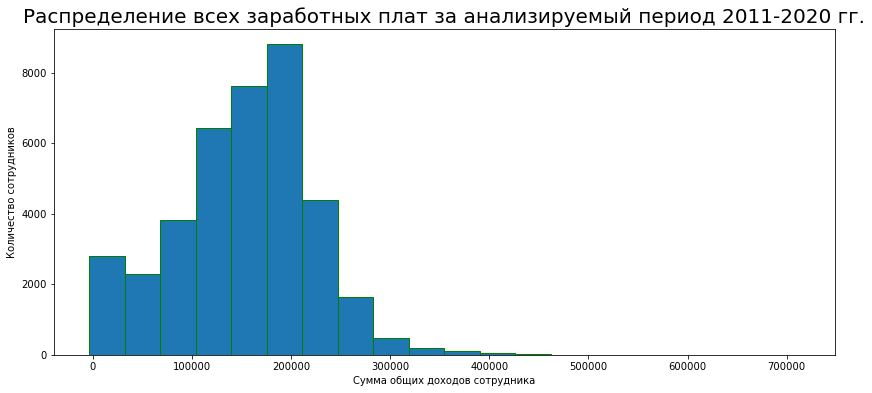

In [34]:
plt.figure(figsize=(14,6))
hist_info = plt.hist(Departaments.TotalPayBenefits, bins=20, edgecolor='green')
plt.title('Распределение всех заработных плат за анализируемый период 2011-2020 гг.', size=20, color='k')
plt.ylabel('Количество сотрудников')
plt.xlabel('Сумма общих доходов сотрудника')
plt.show()

# 1. Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)

# Медиана

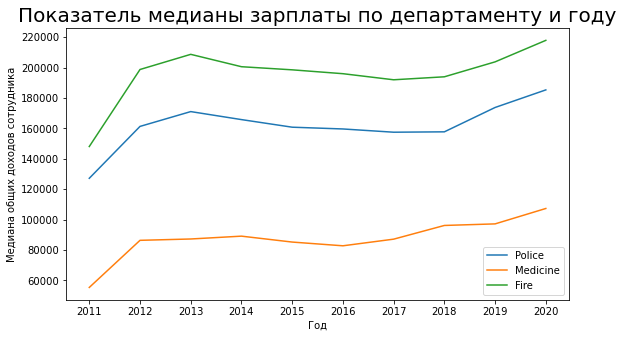

In [35]:
plt.figure(figsize=(9,5))
plt.locator_params(axis ='x', nbins = 10)
for N in ['Police', 'Medicine', 'Fire']:
    plt.plot(df_median[(df_median.Dep == N)]['Year'], df_median[(df_median.Dep == N)]['TotalPayBenefits'],scalex=True, alpha=1)
plt.legend(['Police', 'Medicine', 'Fire'])
plt.title('Показатель медианы зарплаты по департаменту и году', size=20, color='k')
plt.xlabel('Год')
plt.ylabel('Медиана общих доходов сотрудника')
plt.show()

# Cреднее значение

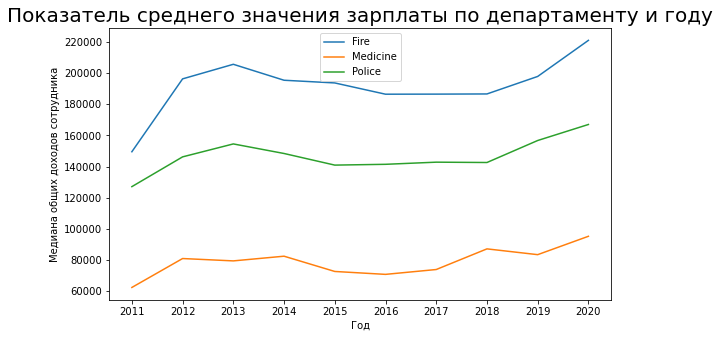

In [36]:
plt.figure(figsize=(9,5))
plt.locator_params(axis ='x', nbins = 10)
for N in ['Fire', 'Medicine', 'Police']:
    plt.plot(df_mean[(df_mean.Dep == N)]['Year'], df_mean[(df_mean.Dep == N)]['TotalPayBenefits'],scalex=True, alpha=1)
plt.legend(['Fire', 'Medicine', 'Police'])
plt.title('Показатель среднего значения зарплаты по департаменту и году', size=20, color='k')
plt.xlabel('Год')
plt.ylabel('Медиана общих доходов сотрудника')
plt.show()

Смотря на динамику медианы по департаментам, можно сделать вывод что, медианы всех департаментов очень похожи по своей динамике, резкий рост пришелся на 2012 год, время 3-его технологического бума в Сан-Франциско в основном связанные с началом эпохи Илона Маска. Произошли такие события как - 'к МКС пристыковался первый частный корабль Dragon компании SpaceX', 'Поставки автомобилей Tesla Motors', что повлекло массовое приглашение специалистов разных областей в разные сферы разработки, что и повлекло такой рост [Источник](https://realnoevremya.ru/articles/162345-klyuchevye-sobytiya-2012-goda-v-rossii-i-mire). Среднее значение и Медиана зарплаты сотрудников Медицины существенно ниже чем у Полиции и Пожарных.

# Максимальное значение

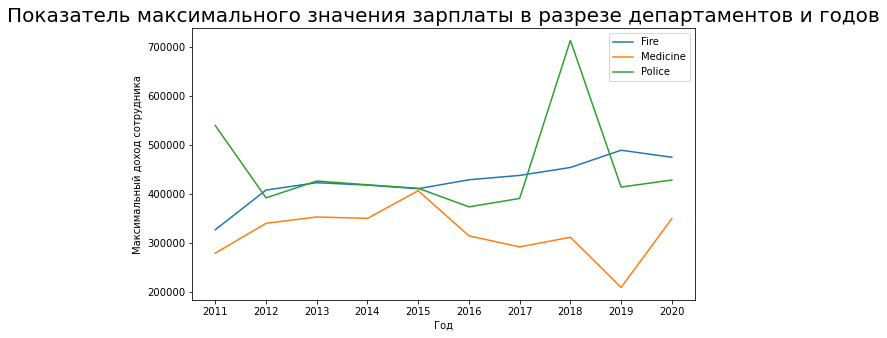

In [37]:
plt.figure(figsize=(9,5))
plt.locator_params(axis ='x', nbins = 10)
for N in ['Fire', 'Medicine', 'Police']:
    plt.plot(df_max[(df_max.Dep == N)]['Year'], df_max[(df_max.Dep == N)]['TotalPayBenefits'],scalex=True, alpha=1)
plt.legend(['Fire', 'Medicine', 'Police'])
plt.title('Показатель максимального значения зарплаты в разрезе департаментов и годов', size=20, color='k')
plt.xlabel('Год')
plt.ylabel('Максимальный доход сотрудника')
plt.show()

Смотря на динамику показателей максимального значения зарплаты департаментов можно отметить две аномалии: 1) резкий рост максимальной зп у сотрудников Полиции наблюдается в 2018 году, это в основном связано с резким увеличением преступности в этот период [Источник](https://russian-rt-com.turbopages.org/turbo/russian.rt.com/s/inotv/2019-08-24/Fox-News-prestupnost-i-razruha) 2) 2019 год, период начала пандемии Коронавируса, так как власти США обьявили локдаун и большинство сотрудников были переведены на удаленный режим работы, так же многие фирмы закрылись, у людей банально не хватало денег на дорогую медицинскую страховку, в связи с этим максимальное значение сотрудников медицины резко упало.





# 2. Как распределяются базовая оплата, сверхурочная работа и льготы между разными группам. Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам

# Медиана базового оклада

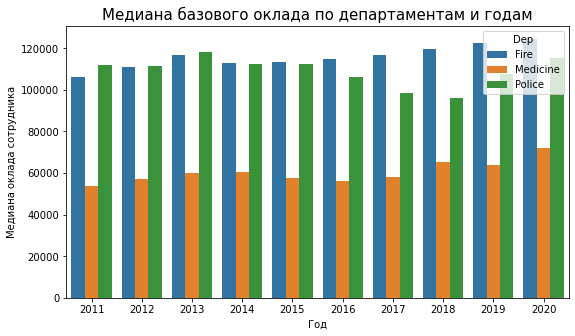

In [45]:
plt.figure(figsize=(9,5))
df_median_BasePay = Departaments.groupby(['Year','Dep'])['BasePay'].median().reset_index()
sns.barplot(x='Year', y='BasePay', hue='Dep', data=df_median_BasePay)
plt.xlabel('Год')
plt.ylabel('Медиана оклада сотрудника')
plt.title('Медиана базового оклада по департаментам и годам', size=15, color='k');

#  Медиана сверхурочных работ

Text(0.5, 1.0, 'Медиана выплат за сверхурочные работы по департаментам и годам')

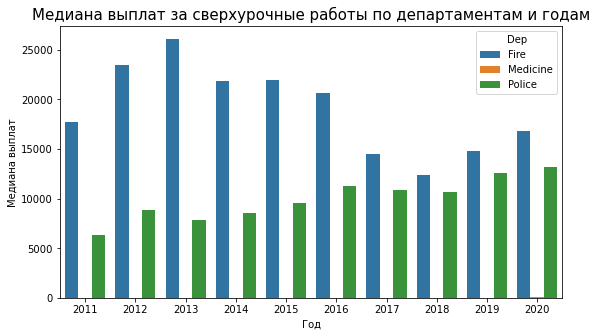

In [44]:
plt.figure(figsize=(9,5))
df_median_OvertimePay = Departaments.groupby(['Year','Dep'])['OvertimePay'].median().reset_index()
sns.barplot(x='Year', y='OvertimePay', hue='Dep', data=df_median_OvertimePay)
plt.xlabel('Год')
plt.ylabel('Медиана выплат')
plt.title('Медиана выплат за сверхурочные работы по департаментам и годам', size=15, color='k')

# Медиана льгот

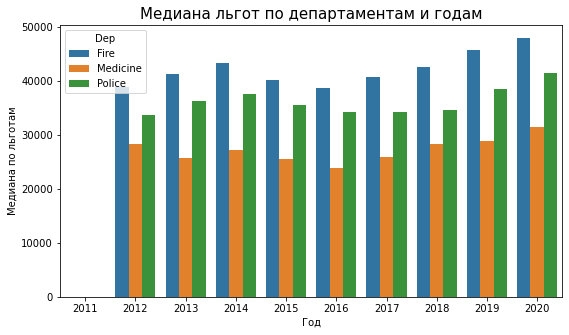

In [43]:
plt.figure(figsize=(9,5))
df_median_Benefits = Departaments.groupby(['Year','Dep'])['Benefits'].median().reset_index()
sns.barplot(x='Year', y='Benefits', hue='Dep', data=df_median_Benefits)
plt.xlabel('Год')
plt.ylabel('Медиана по льготам')
plt.title('Медиана льгот по департаментам и годам', size=15, color='k');

Смотря на эти графики можно сказать что, 1) Распределение достаточно устойчивое 2) Плата за сверхурочные работы в Медицине отсутствует 3) Льгот в 2011 году не было совсем

# 3. Как распределяется бюджет на разные группы (department) с течением времени

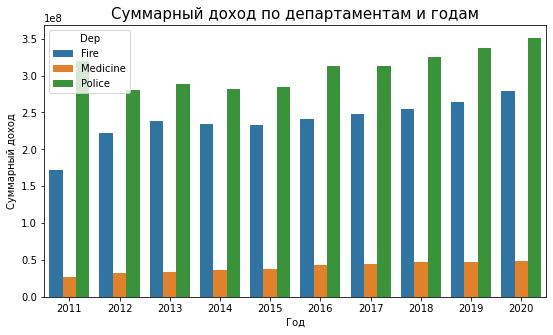

In [42]:
plt.figure(figsize=(9,5))
df_TotalPay = Departaments.groupby(['Year','Dep'])['TotalPayBenefits'].sum().reset_index()
sns.barplot(x='Year', y='TotalPayBenefits', hue='Dep', data=df_TotalPay)
plt.xlabel('Год')
plt.ylabel('Суммарный доход')
plt.title('Суммарный доход по департаментам и годам', size=15, color='k');

Смотря на график больше всего бюджетных денег поступает в Полицию, больше чем департамент мидицины почти на 1000 %

# 4. Какое количество людей в каждом департаменте

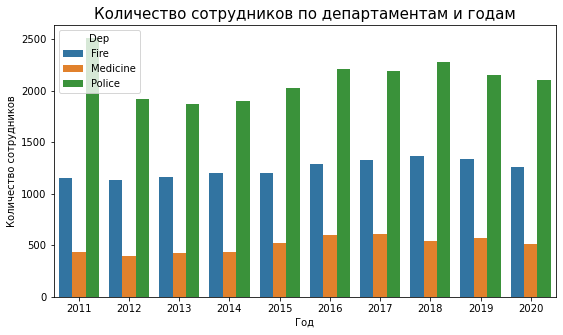

In [47]:
plt.figure(figsize=(9,5))
df_count_people = Departaments.groupby(['Year','Dep'])['JobTitle'].count().reset_index()
df_count_people.rename(columns = {'JobTitle':'Count'}, inplace = True) 
sns.barplot(x='Year', y='Count', hue='Dep', data=df_count_people)
plt.xlabel('Год')
plt.ylabel('Количество сотрудников')
plt.title('Количество сотрудников по департаментам и годам', size=15, color='k');

В 2012 можно надлюдать резкий спад по сравнению с 2011 количества полицейских дальше динамика ушла в боковик, однако несмотря на падение в 2012, департамент Полиции остался самым большим с точки зрения количества сотрудников, превышающий департамент медицины почти в 4 раза

# 5. Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к)


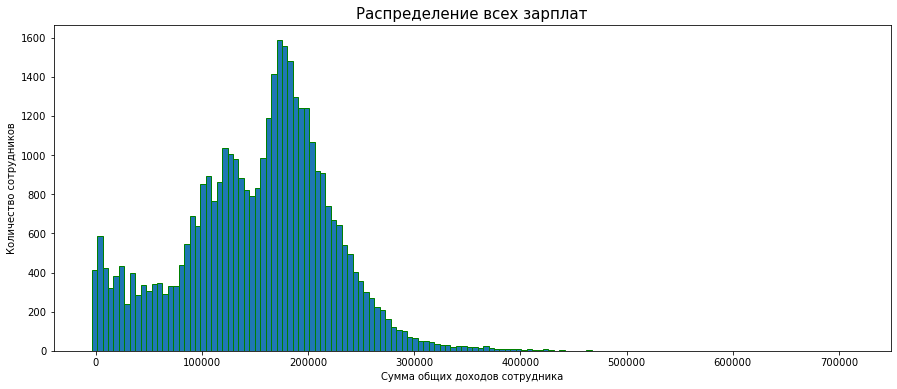

In [53]:
plt.figure(figsize=(15,6))
hist_info = plt.hist(Departaments.TotalPayBenefits, bins=140, edgecolor='green')
plt.title('Распределение всех зарплат', size=15, color='k')
plt.ylabel('Количество сотрудников')
plt.xlabel('Сумма общих доходов сотрудника')
plt.show()

# 6. На базе линейной регрессии постройте прогноз по тому, какие будут закупке в следующий год по каждому департаменту

Импортируем необходимые библиотеки для предикта

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

Группируем данные для построения модели

In [55]:
Departaments_LR = Departaments.copy()
Departaments_LR_Police = Departaments_LR[(Departaments_LR.Dep == 'Police')]
Departaments_LR_Fire = Departaments_LR[(Departaments_LR.Dep == 'Fire')]
Departaments_LR_Medicine = Departaments_LR[(Departaments_LR.Dep == 'Medicine')]
Departaments_LR_Police = Departaments_LR_Police.groupby(['Year'])['TotalPayBenefits'].sum().reset_index()
Departaments_LR_Fire = Departaments_LR_Fire.groupby(['Year'])['TotalPayBenefits'].sum().reset_index()
Departaments_LR_Medicine = Departaments_LR_Medicine.groupby(['Year'])['TotalPayBenefits'].sum().reset_index()


,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Dep
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,Police
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,Police
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,Fire
6,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.0,315981.05,315981.05,2011,San Francisco,Fire
8,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.0,303427.55,303427.55,2011,San Francisco,Fire
...,...,...,...,...,...,...,...,...,...,...
397902,Community Police Services Aide,0.00,0.00,489.91,0.0,489.91,489.91,2020,San Francisco,Police
397991,Medical Social Worker,0.00,0.00,362.69,0.0,362.69,362.69,2020,San Francisco,Medicine
398025,Police Officer 3,308.63,0.00,0.00,0.0,308.63,308.63,2020,San Francisco,Police
398300,Police Officer 3,51.44,0.00,0.00,0.0,51.44,51.44,2020,San Francisco,Police


# Полиция:

In [117]:
Departaments_LR_Police
predict_police = Departaments_LR_Police.drop(['TotalPayBenefits'],axis = 1)
target_police = Departaments_LR_Police['TotalPayBenefits']

In [118]:
X_train,X_test,y_train, y_test = train_test_split(predict_police,target_police, shuffle=False, test_size=0.3)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (7, 1)
X_test (3, 1)


In [119]:
lr_police = LinearRegression()
lr_police.fit(predict_police,target_police)
predicted_police = lr_police.predict(X_test)

In [120]:
predicted_police

array([3.24706845e+08, 3.30730738e+08, 3.36754631e+08])

In [121]:
print("RMSE(Police): ",np.sqrt(mean_squared_error(y_test, predicted_police)))

RMSE(Police):  9277032.95178713


In [122]:
lr_police.predict([[2021]])[0]

342778524.38866425

# Пожарники

In [123]:
predict_fire = Departaments_LR_Fire.drop(['TotalPayBenefits'],axis = 1)
target_fire = Departaments_LR_Fire['TotalPayBenefits']
X_train,X_test,y_train, y_test = train_test_split(predict_fire,target_fire, shuffle=False, test_size=0.05)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (9, 1)
X_test (1, 1)


In [124]:
lr_fire = LinearRegression()
lr_fire.fit(predict_fire,target_fire)

predicted_fire = lr_fire.predict(X_test)
predicted_fire

array([2.76590525e+08])

In [125]:
print("RMSE (Fire): ",np.sqrt(mean_squared_error(y_test, predicted_fire)))

RMSE (Fire):  1949238.1674551368


In [126]:
lr_fire.predict([[2021]])[0]

285019732.1566658

# Медицина

In [127]:
predict_medic = Departaments_LR_Medicine.drop(['TotalPayBenefits'],axis = 1)
target_medic = Departaments_LR_Medicine['TotalPayBenefits']
X_train,X_test,y_train, y_test = train_test_split(predict_medic,target_medic, shuffle=False, test_size=0.05)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (9, 1)
X_test (1, 1)


In [128]:
lr_medic = LinearRegression()
lr_medic.fit(predict_medic,target_medic)  

predicted_medic = model_lr_medic.predict(X_test)
predicted_medic  

array([50758853.33454609])

In [129]:
print("RMSE(Medicine): ",np.sqrt(mean_squared_error(y_test, predicted_medic)))

RMSE(Medicine):  1888970.254546009


In [130]:
lr_medic.predict([[2021]])[0]

53205933.06133366

# Визуализация предиктов по департаментам

Создаем новый ДФ

In [131]:
TotalPay_predict = df_TotalPay.copy()
cont1 = {'Year':2021, 'Dep':'Police', 'TotalPayBenefits':lr_police.predict([[2021]])[0]}
cont2 = {'Year':2021, 'Dep':'Fire', 'TotalPayBenefits':lr_fire.predict([[2021]])[0]}
cont3 = {'Year':2021, 'Dep':'Medicine', 'TotalPayBenefits':lr_medic.predict([[2021]])[0]}
TotalPay_predict = TotalPay_predict.append(cont1, ignore_index=True)
TotalPay_predict = TotalPay_predict.append(cont2, ignore_index=True)
TotalPay_predict = TotalPay_predict.append(cont3, ignore_index=True)
TotalPay_predict


,Year,Dep,TotalPayBenefits
0,2011,Fire,1.720387e+08
1,2011,Medicine,2.692149e+07
2,2011,Police,3.192681e+08
3,2012,Fire,2.226816e+08
4,2012,Medicine,3.183268e+07
5,2012,Police,2.805306e+08
6,2013,Fire,2.380130e+08
7,2013,Medicine,3.378203e+07
8,2013,Police,2.887283e+08
9,2014,Fire,2.337893e+08


Отображаем на графике

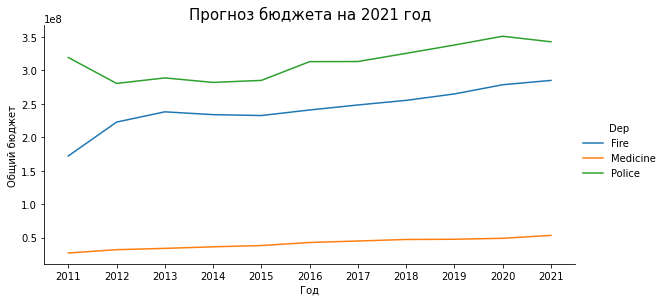

In [132]:
sns.relplot(
    x='Year', 
    y='TotalPayBenefits', 
    hue='Dep', 
    data=TotalPay_predict, 
    height=4, 
    aspect=2,
    kind='line')
plt.xlabel('Год')
plt.ylabel('Общий бюджет')
plt.locator_params(axis ='x', nbins = 11)
plt.title('Прогноз бюджета на 2021 год', size=15, color='k');

# Выводы:

1. 
Средний доход сотрудника по всем департаментам составил 152160
2. 
Медианный доход сотрудника составил 162554.66
3. 
Резкий рост медианы пришелся на 2012 год, время 3-его технологического бума в Сан-Франциско в основном связанные с началом эпохи Илона Маска. Произошли такие события как - 'к МКС пристыковался первый частный корабль Dragon компании SpaceX', 'Поставки автомобилей Tesla Motors', что повлекло массовое приглашение специалистов разных областей в разные сферы разработки, что и повлекло такой рост по нашим департаментам.
4.
Резкий рост максимальной зп у сотрудников Полиции наблюдается в 2018 году, это в основном связано с резким увеличением преступности в этот период
5.
2019 год, период начала пандемии Коронавируса, так как власти США обьявили локдаун и большинство сотрудников были переведены на удаленный режим работы, так же многие фирмы закрылись, у людей банально не хватало денег на дорогую медицинскую страховку, в связи с этим максимальное значение зп сотрудников медицины резко упало
6.
Выплаты за сверхурочные работы в департаменте медицины отсутствуют
7.
2011 году льгот не было совсем по всем департаментам.
8.
В 2012 можно надлюдать резкий спад по сравнению с 2011 количества полицейских дальше динамика ушла в боковик, однако несмотря на падение в 2012, департамент Полиции остался самым большим с точки зрения количества сотрудников, превышающий департамент медицины почти в 4 раза